## UserNet mreža-analiza ##

In [1]:
import networkx as nx
import pandas as pd
import scipy.stats as stats
import numpy as np
import pickle

In [48]:
input_path = "models/directed_count_aggregationUserNet.gml" 

GSNet = nx.DiGraph(nx.read_gml(input_path)) 

In [ ]:
GSNet.nodes()

In [50]:
print(len(GSNet))

218731


In [51]:
print(nx.info(GSNet))

DiGraph with 218731 nodes and 2377528 edges


## Gustina mreže ##

In [52]:
print(nx.density(GSNet))

4.969434249875524e-05


## Povezane komponente grafa SNet ##

In [63]:
print(nx.is_strongly_connected(GSNet))
print(nx.is_weakly_connected(GSNet))

False
False


In [64]:
component_size_list=[len(c) for c in sorted(nx.strongly_connected_components(GSNet), key=len, reverse=True)]
print(f'Broj povezanih komponenti:'+str(len(component_size_list)))
print(f'Lista povezanih komponenti:')
print(component_size_list)

Broj povezanih komponenti:173219
Lista povezanih komponenti:
[45417, 11, 6, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## Dominantna komponenta ##

In [66]:
dominant_cc=max(nx.strongly_connected_components(GSNet), key=len)
Gdom=GSNet.subgraph(dominant_cc).copy()
print(f"Dominantna komponenta ima {len(Gdom.nodes())} cvorova i {len(Gdom.edges())} grana")
dom_path="models/dominantna_komponentaUserNet.gml"
nx.write_gml(Gdom, dom_path)


Dominantna komponenta ima 45417 cvorova i 2256221 grana


## Dijametar mreže ##

In [ ]:
print(nx.diameter(Gdom)) #sporo se izvrsava

## Prosečna distanca 

In [11]:
print(nx.average_shortest_path_length(Gdom)) #sporo se izvrsava

## Koeficijent klasterisanja ##

In [21]:
subredit, clustering_coef=zip(*nx.clustering(GSNet, weight='weight').items())
nenula=[(sub, cc) for sub, cc in zip(subredit, clustering_coef) if cc>0]

dataFrameClu=pd.DataFrame(nenula, columns=['subreddit','clustering coeficient'])
dataFrameClu.sort_values('clustering coeficient', inplace=True)

In [22]:
prosecni_stepen_klasterisanja=nx.average_clustering(GSNet)
print(f'Prosečan stepen klasterisanja:{prosecni_stepen_klasterisanja}')
print('Lokalni stepeni klasterisanja:')
print(dataFrameClu)

Prosečan stepen klasterisanja:0.027091447519258464
Lokalni stepeni klasterisanja:
       subreddit  clustering coeficient
15057    Twylite           8.908749e-07
41340    bluh123           1.558390e-06
15567   dskoziol           2.531133e-06
8631     chialin           2.812370e-06
33710     samria           2.849620e-06
...          ...                    ...
22793  nahantFDL           4.551053e-03
21219     shamba           5.568018e-03
10316    blizz81           6.061559e-03
5027       Lothy           8.039173e-03
21628   thee-ass           9.407807e-03

[42547 rows x 2 columns]


           users  clustering coeficient
15057    Twylite           8.908749e-07
41340    bluh123           1.558390e-06
15567   dskoziol           2.531133e-06
8631     chialin           2.812370e-06
33710     samria           2.849620e-06
...          ...                    ...
22793  nahantFDL           4.551053e-03
21219     shamba           5.568018e-03
10316    blizz81           6.061559e-03
5027       Lothy           8.039173e-03
21628   thee-ass           9.407807e-03

[42547 rows x 2 columns]


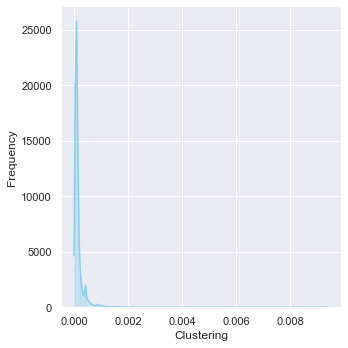

In [42]:
import seaborn as sns
dataFrameClu.rename(columns = {'subreddit':'users'}, inplace = True)
print(dataFrameClu)
sns.set(rc={'figure.figsize':(7,7)})
ax = sns.displot(dataFrameClu['clustering coeficient'],
                  bins=100,
                  kde=True,
                  color='skyblue')
ax.set(xlabel='Clustering', ylabel='Frequency')

In [23]:
print(f'Maksimalni stepen klasterisanja:')
print(dataFrameClu.sort_values('clustering coeficient', ascending=False).head(1))

Maksimalni stepen klasterisanja:
      subreddit  clustering coeficient
21628  thee-ass               0.009408


In [24]:
print(f'Globalni koeficijent klasterisanja:')
print(nx.transitivity(GSNet))

Globalni koeficijent klasterisanja:
0.06085203955246486


### Upoređivanje sa ER mrežom ###

In [16]:
n=GSNet.number_of_nodes()
m=GSNet.number_of_edges()

In [17]:
p=(2*float(m))/(n*(n-1))  #p=2*m/(n*(n-1)), p je verovatnoca formiranja grane takva da je ocekivani broj grana m
print(p)
er=nx.erdos_renyi_graph(n,p)
delta_m=m-er.number_of_edges()
print(f"Broj grana originalne mreže minus broj grana u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

8.74845480606096e-05
Broj grana originalne mreže minus broj grana u ER mreži iznosi -2429, što je odstupanje od 0.1160666544658903%


In [18]:
subredit1, clustering_coef1=zip(*nx.clustering(er, weight='weight').items())
nenula=[(sub, cc) for sub, cc in zip(subredit1, clustering_coef1) if cc>0]

dataFrameClu1=pd.DataFrame(nenula, columns=['subreddit','clustering coeficient'])
dataFrameClu1.sort_values('clustering coeficient', inplace=True)
prosecni_stepen_klasterisanja1=nx.average_clustering(er)
print(f'Prosečan stepen klasterisanja ER mreže:{prosecni_stepen_klasterisanja1}')
print('Lokalni stepeni klasterisanja ER mreže:')
print(dataFrameClu1)
print(f'Maksimalni stepen klasterisanja ER mreže:')
print(dataFrameClu1.sort_values('clustering coeficient', ascending=False).head(1))
print(f'Globalni koeficijent klasterisanja ER mreže:')
print(nx.transitivity(er))

Prosečan stepen klasterisanja ER mreže:8.764871323898447e-05
Lokalni stepeni klasterisanja ER mreže:
      subreddit  clustering coeficient
436       26958               0.001350
3417     215998               0.001502
321       20025               0.001502
913       56458               0.001587
1957     120826               0.001587
...         ...                    ...
824       51419               0.027778
62         3611               0.027778
1550      96299               0.027778
3289     207398               0.047619
1831     113708               0.047619

[3464 rows x 2 columns]
Maksimalni stepen klasterisanja ER mreže:
      subreddit  clustering coeficient
1831     113708               0.047619
Globalni koeficijent klasterisanja ER mreže:
8.728965907509033e-05


In [19]:
er_gcc=nx.transitivity(er)
gcc=nx.transitivity(GSNet)

In [20]:
tabela=pd.DataFrame([(prosecni_stepen_klasterisanja, prosecni_stepen_klasterisanja1,
                     max(clustering_coef),
                     max(clustering_coef1), gcc, er_gcc)],
                    columns=['ACC','ACC-ER','LCC','LCC-ER','GCC','GCC-ER'])
print(tabela)

        ACC    ACC-ER      LCC    LCC-ER       GCC    GCC-ER
0  0.041869  0.000088  0.00701  0.047619  0.082784  0.000087


In [ ]:
print(nx.diameter(er))  #sporo se izvrsava

In [ ]:
print(nx.average_shortest_path_length(er)) #sporo se izvrsava

## Fenomen malog sveta

In [23]:
import numpy as np

Za fenomen malog sveta realne mreže, potrebno je da budu zadovoljeni uslovi:
1. mala prosečna distanca dva čvora u mreži u odnosu na veličinu mreže: lnetwork~ln(n)/ln(d)
2. visoki globalni koeficijent klasterisanja u odnosu na globalni koeficijent klasterisanja kod ER mreže: Cn>>Cer

In [24]:
lnN=np.log(len(GSNet.nodes()))
print(lnN)
d=len(GSNet.edges())/len(GSNet.nodes())
lnd=np.log(d)
print(lnd)
print(lnN/lnd) 

12.295597943304704
2.258397817120417
5.444389757240501


Prosečna udaljenost bilo koja dva čvora u mreži SNet je 2.1074294899060666~2.393848552286191, a globalni stepen klasterizacije je 0.26455544014478105, što je mnogo veće od globalnog koeficijenta klasterizacije ER mreže (0.015529), to je ostvaren fenomen malog sveta.

## Asortativnost

In [25]:
r1=nx.degree_assortativity_coefficient(GSNet)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}") #radi

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: -0.08442823042193114


Mreža je disasortativna, čvorovi nemaju tendenciju da se vezuju sa čvorovima sličnog stepena.

In [26]:
r2=nx.degree_assortativity_coefficient(GSNet, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}") #zasto prijavljuje gresku

Koeficijent asortativnosti na osnovu težinskog stepena čvora: -0.0673137745668379


Mreža je disasortativna, čvorovi nemaju tendenciju da se vezuju sa čvorovima sličnog stepena.

## Fenomen kluba bogatih

In [27]:
#rich_club_coef=nx.rich_club_coefficient(GSNet)

Čvorovi nemaju tendenciju da se vezuju međusobno, pogotovo da ne mogu da se vezuju sa čvorovima većeg stepena, jer smo zaključili da je mreža disasortitvna, nije ostvaren fenomen kluba bogatih.

## Power-law distribucija 

In [28]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

In [29]:
def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees) #raspakovanje
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())     #x-stepen, y-broj cvorova koji imaju odredjeni stepen                                                 

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({0: 130016, 1: 18390, 2: 16566, 3: 5606, 4: 5005, 5: 2802, 6: 2673, 7: 1803, 8: 1802, 9: 1335, 10: 1329, 11: 1126, 12: 1076, 14: 862, 13: 861, 16: 728, 15: 713, 17: 635, 18: 619, 19: 547, 20: 509, 21: 507, 22: 466, 24: 418, 23: 395, 25: 380, 27: 372, 26: 363, 29: 343, 28: 328, 32: 308, 30: 298, 31: 276, 35: 269, 33: 268, 36: 268, 34: 265, 39: 264, 40: 245, 38: 237, 37: 217, 44: 216, 45: 210, 42: 209, 43: 209, 41: 202, 46: 183, 47: 175, 48: 173, 54: 167, 51: 164, 52: 163, 50: 157, 49: 150, 55: 150, 56: 146, 59: 142, 61: 142, 57: 140, 53: 139, 62: 131, 67: 127, 66: 120, 58: 118, 60: 117, 77: 112, 65: 111, 68: 110, 83: 109, 71: 105, 63: 102, 69: 101, 78: 101, 85: 97, 74: 97, 81: 97, 76: 96, 70: 95, 73: 92, 86: 91, 95: 91, 84: 91, 72: 87, 90: 86, 91: 86, 82: 86, 101: 85, 75: 84, 88: 80, 98: 80, 64: 80, 80: 79, 87: 79, 94: 77, 93: 73, 100: 73, 102: 73, 79: 73, 104: 72, 106: 70, 99: 70, 112: 69, 105: 68, 96: 68, 89: 66, 113: 65, 131: 62, 92: 60, 109: 59, 108: 58, 119: 58, 110: 58, 11

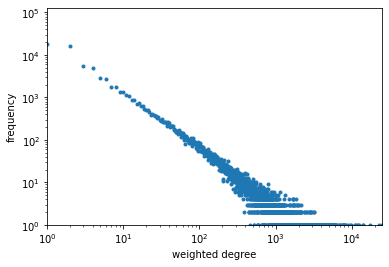

In [12]:
plot_deg_frequency(GSNet, True)

Navedena distribucija čvorova po težinskom stepenu prati power-law raspodelu, jer većina čvorova ima samo nekoliko veza , a neki čvorovi imaju veliki broj veza (vidimo da ima po jedan čvor kod većih stepena).

## Habovi i autoriteti

In [88]:
from itertools import islice

In [69]:
hubs_authorities=nx.hits(GSNet) #SNet mreza je neusmerena, pa ne mogu se odrediti habovi i autoriteti

In [73]:
hubs = hubs_authorities[0]
auth = hubs_authorities[1]

In [86]:
hubsSorted = dict(sorted(hubs.items(), key=lambda item: item[1], reverse=True))
authSorted = dict(sorted(auth.items(), key=lambda item: item[1], reverse=True))

In [91]:
i=0
for key, value in hubsSorted.items():
    if(i>=10):
        break
    print('{}: {}'.format(key, value))
    i += 1

GrrlScientist: 0.22235675709144617
NoMoreNicksLeft: 0.0028595290670926873
Fazookus: 0.002699062941231746
soyabstemio: 0.0026343649740417
Buck_Malibu: 0.0021714918289035597
MrKlaatu: 0.002124461734065163
alllie: 0.0021049079704861338
Ra__: 0.0019001784452063347
malcontent: 0.0018405205385010602
matts2: 0.0018231170040793993


In [92]:
i=0
for key, value in authSorted.items():
    if(i>=10):
        break
    print('{}: {}'.format(key, value))
    i += 1

GrrlScientist: 0.2901150074938587
qgyh2: 0.006034827808617601
rmuser: 0.0057896286710665155
alllie: 0.0038705528781923884
noname99: 0.0027821796681133247
georgewashingtonblog: 0.0026440114848207633
twolf1: 0.0026247566162638145
maxwellhill: 0.0026050434697160968
IAmperfectlyCalm: 0.0024255372845962955
gst: 0.002251430193146334


## Analiza mera centralnosti ##

1) Centralnosti po stepenu, bliskosti, relacionoj centralnosti 2) Centralnosti po sopstvenom vektoru

In [93]:
DC_dict_in=nx.in_degree_centrality(GSNet)
DC_dict_out=nx.out_degree_centrality(GSNet)

In [98]:
#CC_dict=nx.closeness_centrality(GSNet)

In [ ]:
#BC_dict=nx.betweenness_centrality(GSNet) #predugo

In [96]:
EVC_dict = nx.eigenvector_centrality(GSNet)

In [97]:
df1_in=pd.DataFrame.from_dict(DC_dict_in, orient='index', columns=['DC_in'])
df1_out=pd.DataFrame.from_dict(DC_dict_out, orient='index', columns=['DC_out'])
#df2=pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
#df3=pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
df4=pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
df=pd.concat([df1_in, df1_out, df4], axis=1)
print(df)

                      DC_in    DC_out           EVC
utcursch           0.000142  0.000146  6.165779e-04
tmnicelt           0.000000  0.000000  2.292818e-15
chrisg16           0.000000  0.000000  2.292818e-15
heavenlyangeleyes  0.000000  0.000000  2.292818e-15
chavo              0.000000  0.000000  2.292818e-15
...                     ...       ...           ...
Raptor_Twin        0.000000  0.000000  2.292818e-15
blasthead          0.000320  0.000000  2.796580e-03
prunetracy         0.000101  0.000165  5.657509e-04
univerio           0.000320  0.000558  2.002649e-03
JangJang           0.000000  0.000000  2.292818e-15

[218731 rows x 3 columns]


In [99]:
with open("data1/userNet-centralities", 'wb') as file:
    pickle.dump(df, file)

### Centralnost ulaznom po stepenu ###

In [101]:
df_dc_in = pd.DataFrame({'DC_in':df['DC_in']})
df_dc_in.sort_values(by='DC_in', ascending=False, inplace = True)
print(df_dc_in.head(10))

                         DC_in
rmuser                0.039108
qgyh2                 0.035007
noname99              0.026672
alllie                0.024770
swampsparrow          0.023755
gst                   0.022951
maxwellhill           0.021680
twolf1                0.018905
georgewashingtonblog  0.018009
7oby                  0.016107


### Centralnost po izlaznom stepenu

In [102]:
df_dc_out = pd.DataFrame({'DC_out':df['DC_out']})
df_dc_out.sort_values(by='DC_out', ascending=False, inplace = True)
print(df_dc_out.head(10))

                   DC_out
NoMoreNicksLeft  0.015535
mexicodoug       0.013738
mutatron         0.013071
randomb0y        0.012618
7oby             0.012568
h0dg3s           0.012143
RugerRedhawk     0.011960
Poromenos        0.011681
malcontent       0.011512
nixonrichard     0.011489


### Centralnost po bliskosti ###

In [103]:
#df_cc = pd.DataFrame({'CC':df['CC']})
#df_cc.sort_values(by='CC', ascending=False, inplace = True)
#print(df_cc.head(10))

### Relaciona centralnost ###

In [104]:
#df_bc = pd.DataFrame({'BC':df['BC']})
#df_bc.sort_values(by='BC', ascending=False, inplace = True)
#print(df_bc.head(10))

### Centralnost po sopstvenom vektoru ###

In [105]:
df_ec = pd.DataFrame({'EVC':df['EVC']})
df_ec.sort_values(by='EVC', ascending=False, inplace = True)
print(df_ec.head(10))

                           EVC
rmuser                0.130462
qgyh2                 0.126434
noname99              0.106825
alllie                0.102037
swampsparrow          0.092364
maxwellhill           0.091434
twolf1                0.086982
7oby                  0.083120
georgewashingtonblog  0.082530
gst                   0.075414


In [ ]:
with open("data1/userNet-centralities", 'rb') as file:
    df = pickle.load(file)

### Kacova centralnost ###

In [110]:
#import pickle
#with open("data1/katz_b=1000-UserNet", 'rb') as file:
#    df_katz = pickle.load(file)
KatzC_dict = nx.katz_centrality(GSNet, alpha=0.000006, beta=1000.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katz_in = pd.DataFrame.from_dict(KatzC_dict, orient='index', columns=['EVC'])
df_katz_in['EVC_rank']=df_katz_in['EVC'].rank(ascending=False) 
print(df_katz_in.sort_values(by='EVC', ascending=False).head(10))

with open("data1/katz_b=1000-UserNet_in",'wb') as file:
    pickle.dump(df_katz_in, file)

                           EVC  EVC_rank
rmuser                0.002429       1.0
qgyh2                 0.002414       2.0
gst                   0.002318       3.0
alllie                0.002304       4.0
noname99              0.002291       5.0
maxwellhill           0.002264       6.0
swampsparrow          0.002263       7.0
twolf1                0.002251       8.0
georgewashingtonblog  0.002250       9.0
IAmperfectlyCalm      0.002239      10.0


In [111]:
KatzC_dict = nx.katz_centrality(GSNet.reverse(), alpha=0.000006, beta=1000.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katz_out = pd.DataFrame.from_dict(KatzC_dict, orient='index', columns=['EVC'])
df_katz_out['EVC_rank']=df_katz_out['EVC'].rank(ascending=False) 
print(df_katz_out.sort_values(by='EVC', ascending=False).head(10))

with open("data1/katz_b=1000-UserNet_out",'wb') as file:
    pickle.dump(df_katz_out, file)

                      EVC  EVC_rank
NoMoreNicksLeft  0.002243       1.0
malcontent       0.002229       2.0
matts2           0.002224       3.0
7oby             0.002205       4.0
mexicodoug       0.002201       5.0
mutatron         0.002200       6.0
randomb0y        0.002199       7.0
aletoledo        0.002198       8.0
alllie           0.002198       9.0
RugerRedhawk     0.002197      10.0


## Korelacija metrika centralnosti ##

In [112]:
df_correlation1=pd.merge(df, df_katz_in, left_index=True, right_index=True)
df_correlation1.rename(columns = {'EVC_x':'EVC', 'EVC_y':'KatzC_in'}, inplace = True)
df_correlation1=df_correlation1.drop(['EVC_rank'], axis=1)
print(df_correlation1)

                      DC_in    DC_out           EVC  KatzC_in
utcursch           0.000142  0.000146  6.165779e-04  0.002138
tmnicelt           0.000000  0.000000  2.292818e-15  0.002138
chrisg16           0.000000  0.000000  2.292818e-15  0.002138
heavenlyangeleyes  0.000000  0.000000  2.292818e-15  0.002138
chavo              0.000000  0.000000  2.292818e-15  0.002138
...                     ...       ...           ...       ...
Raptor_Twin        0.000000  0.000000  2.292818e-15  0.002138
blasthead          0.000320  0.000000  2.796580e-03  0.002139
prunetracy         0.000101  0.000165  5.657509e-04  0.002138
univerio           0.000320  0.000558  2.002649e-03  0.002139
JangJang           0.000000  0.000000  2.292818e-15  0.002138

[218731 rows x 4 columns]


In [113]:
df_correlation2=pd.merge(df_correlation1, df_katz_out, left_index=True, right_index=True)
df_correlation2.rename(columns = {'EVC_x':'EVC', 'EVC_y':'KatzC_out'}, inplace = True)
df_correlation2=df_correlation2.drop(['EVC_rank'], axis=1)
print(df_correlation2)

                      DC_in    DC_out           EVC  KatzC_in  KatzC_out
utcursch           0.000142  0.000146  6.165779e-04  0.002138   0.002138
tmnicelt           0.000000  0.000000  2.292818e-15  0.002138   0.002138
chrisg16           0.000000  0.000000  2.292818e-15  0.002138   0.002138
heavenlyangeleyes  0.000000  0.000000  2.292818e-15  0.002138   0.002138
chavo              0.000000  0.000000  2.292818e-15  0.002138   0.002138
...                     ...       ...           ...       ...        ...
Raptor_Twin        0.000000  0.000000  2.292818e-15  0.002138   0.002138
blasthead          0.000320  0.000000  2.796580e-03  0.002139   0.002138
prunetracy         0.000101  0.000165  5.657509e-04  0.002138   0.002138
univerio           0.000320  0.000558  2.002649e-03  0.002139   0.002140
JangJang           0.000000  0.000000  2.292818e-15  0.002138   0.002138

[218731 rows x 5 columns]


In [ ]:
labele=['DC_in', 'DC_out', 'EVC', 'KatzC_in', 'KatzC_out']
'''
matrica_korelacije=pd.DataFrame(columns=['DC','CC','BC','EVC','KatzC'], index=['DC','CC','BC','EVC','KatzC'])
p_val_matrica=pd.DataFrame(columns=['DC','CC','BC','EVC','KatzC'], index=['DC','CC','BC','EVC','KatzC'])

for i in labele:
    for j in labele:
        matrica_korelacije[i][j], p_val_matrica[i][j]=stats.kendalltau(df_correlation[i], df_correlation[j])
        
print(matrica_korelacije)
print(p_val_matrica) 
'''

## Kompozitna mera centralnosti ##

In [115]:
df_ = df_correlation2
for metric in labele:
    df_[f"{metric}_rank"] = df_correlation2[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_in_rank'] * df_['DC_out_rank'] * df_['EVC_rank'] * df_['KatzC_in_rank'] * df_['KatzC_out_rank'] #composite_rank=dc_rank*cc_rank*bc_rank*evc_rank*katz_rank

df_=df_.sort_values(['composite_rank'], ascending = True)
print(df_.head(10))

                    DC_in    DC_out       EVC  KatzC_in  KatzC_out  \
NoMoreNicksLeft  0.010076  0.015535  0.066063  0.002212   0.002243   
rmuser           0.039108  0.006593  0.130462  0.002429   0.002166   
alllie           0.024770  0.010666  0.102037  0.002304   0.002198   
7oby             0.016107  0.012568  0.083120  0.002223   0.002205   
qgyh2            0.035007  0.004371  0.126434  0.002414   0.002159   
malcontent       0.007690  0.011512  0.043211  0.002206   0.002229   
nixonrichard     0.009829  0.011489  0.061931  0.002191   0.002193   
mutatron         0.007589  0.013071  0.052657  0.002172   0.002200   
randomb0y        0.008270  0.012618  0.052654  0.002175   0.002199   
matts2           0.006556  0.011288  0.044977  0.002196   0.002224   

                 DC_in_rank  DC_out_rank  EVC_rank  KatzC_in_rank  \
NoMoreNicksLeft        27.0          1.0      13.0           13.0   
rmuser                  1.0         78.0       1.0            1.0   
alllie                

## Detekcija komuna ##

### Hijerarhijsko klasterisanje

In [ ]:
import itertools
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [ ]:
'''
comp=nx.community.girvan_newman(GSNet)
k=15
hierarchical_decomposition={}
i=2
for communities in itertools.islice(comp, k):
    hierarchical_decomposition[i]=tuple(sorted(c) for c in communities)
    i=i+1  #dugo traje
'''

In [ ]:
'''
def print_decomposition(hierarchy, num_clusters):
    decomposition_tupple = hierarchy[num_clusters]
    print(f"Dekompozicija na {num_clusters} komuna")
    for com_ind in range(num_clusters):
        print(f"Komuna {com_ind+1} ima {len(decomposition_tupple[com_ind])} clanova")
        print(decomposition_tupple[com_ind])
        print("-----------------------------------------------------------------------")
'''

In [ ]:
#print_decomposition(hierarchical_decomposition, 3)

In [ ]:
def plot_and_save_dendrogram(G):

    plt.rcParams["figure.figsize"] = (24,13)
    # get Girvan-Newman communities list
    communities = list(nx.community.girvan_newman(G))

    # building initial dict of node_id to each possible subset:
    node_id = 0
    init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
    for comm in communities:
        for subset in list(comm):
            if subset not in init_node2community_dict.values():
                node_id += 1
                init_node2community_dict[node_id] = subset

    # turning this dictionary to the desired format in @mdml's answer
    node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
    for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
        for node_id_parent, group in init_node2community_dict.items():
            if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
                node_id_to_children[node_id_parent].append(node_id1)
                node_id_to_children[node_id_parent].append(node_id2)

    # also recording node_labels dict for the correct label for dendrogram leaves
    node_labels = dict()
    for node_id, group in init_node2community_dict.items():
        if len(group) == 1:
            node_labels[node_id] = list(group)[0]
        else:
            node_labels[node_id] = ''

    # also needing a subset to rank dict to later know within all k-length merges which came first
    subset_rank_dict = dict()
    rank = 0
    for e in communities[::-1]:
        for p in list(e):
            if tuple(p) not in subset_rank_dict:
                subset_rank_dict[tuple(sorted(p))] = rank
                rank += 1
    subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

    # my function to get a merge height so that it is unique (probably not that efficient)
    def get_merge_height(sub):
        sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
        n = len(sub_tuple)
        other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
        min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
        range = (max_rank-min_rank) if max_rank > min_rank else 1
        return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

    # finally using @mdml's magic, slightly modified:
    G           = nx.DiGraph(node_id_to_children)
    nodes       = G.nodes()
    leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
    inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

    # Compute the size of each subtree
    subtree = dict( (n, [n]) for n in leaves )
    for u in inner_nodes:
        children = set()
        node_list = list(node_id_to_children[u])
        while len(node_list) > 0:
            v = node_list.pop(0)
            children.add( v )
            node_list += node_id_to_children[v]
        subtree[u] = sorted(children & leaves)

    inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

    # Construct the linkage matrix
    leaves = sorted(leaves)
    index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
    Z = []
    k = len(leaves)
    for i, n in enumerate(inner_nodes):
        children = node_id_to_children[n]
        x = children[0]
        for y in children[1:]:
            z = tuple(sorted(subtree[x] + subtree[y]))
            i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
            Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
            index[z] = k
            subtree[z] = list(z)
            x = z
            k += 1

    # dendrogram
    plt.figure()
    dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
    plt.savefig('dendrogram.png')

In [ ]:
#plot_and_save_dendrogram(Gdom)

## Spektralno klasterisanje

In [116]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from docx import Document
import math #?
import sympy
from sklearn.cluster import SpectralClustering

In [117]:
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"etf/{title}.svg")
    plt.show() 

def plot_scatterplot2(x_data, y_data, x_label, y_label, title, file_name):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"etf/{file_name}.svg")
    plt.show() 

In [118]:
def find_ccs2(eigenvectors_holder, n):
    components = []
    already_solved = []
    for current in range(0, n):
        if current not in already_solved:
            component = [current]
            for running in range (current+1, n):
                if running not in already_solved:
                    b = True
                    for tracer in range(0, len(eigenvectors_holder)):
                        eigenvector = eigenvectors_holder[tracer]
                        if not in_range(eigenvector[current], eigenvector[running], math.pow(10,-12)):
                            b = False
                    if b:
                        component.append(running)
                        already_solved.append(running)
            already_solved.append(current)
            components.append(component)
    return components

In [119]:
def get_components3(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    return find_ccs2(eigenspace0_basis, len(eigenspace0_basis[0]))

In [ ]:

# read the multigraph
#G = GSNet
# create weighted graph G2 from multigraph G
G2 = nx.DiGraph()
for u,v,data in GSNet.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G2.has_edge(u,v):
        G2[u][v]['weight'] += w
    else:
        G2.add_edge(u, v, weight=w)

zaposleni_multigraf = set(G2.nodes)

print("Izolovani cvorovi:")
for z in GSNet.nodes:
    if z not in zaposleni_multigraf:
        G2.add_node(z)
        print(z)


#print(G2.edges(data=True))

#nx.write_pajek(G2, "etf/agregirano_etf.net")
# [(1, 2, {'weight': 26}), (2, 3, {'weight': 42})]

In [ ]:
'''
L = nx.directed_laplacian_matrix(G2).toarray()

eigenvalues = linalg.eigvals(L) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
df_eig30 = df_eig[:30]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)

doc = Document()
doc = Document('spektralna_eig_UserNet.docx')
t = doc.add_table(df_eig30.shape[0]+1, df_eig30.shape[1])
t.cell(0,0).text = r'$k$'
t.cell(0,1).text = r'$\lambda_k$'
for i in range(df_eig30.shape[0]):
    for j in range(df_eig30.shape[-1]):
        t.cell(i+1,j).text = str(df_eig30.values[i,j])
doc.save('etf/spektralna_eig_UserNet.docx')




plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana')
'''

In [ ]:
# prvih 30 sopstvenih vrednosti

df_eig_30 = df_eig[:30]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 30 sopstvenih vrednosti graf laplasijana')


In [ ]:
# eigengap


df_gap = df_eig.iloc[:,1].diff()
df_gap = df_gap.astype(np.float64)

df_gap = df_gap[1:]
enumerator_column = np.array(range(1, len(df_gap)+1))

df_gap = pd.DataFrame(list(zip(enumerator_column, df_gap)))
  
plot_scatterplot(df_gap.iloc[:,0], df_gap.iloc[:,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap')

plot_scatterplot(df_gap.iloc[:30,0], df_gap.iloc[:30,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap prvih 30 sopstvenih vrednosti graf laplasijana')

In [125]:
def get_components2(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    #print("EVM:")
    #EV_mat = np.array(list(eigenspace0_basis)).T
    #print(pd.DataFrame(EV_mat))
    
    IV_rref, _ = sympy.Matrix(eigenspace0_basis).rref()
    print(IV_rref)
    
    
    # transformation into indicator vectors
    #indicator_vector_container = []
    #for eigenvector in eigenspace0_basis:
        
    #    max_component = max([abs(c) for c in eigenvector])
    #    indicator_vector = [abs(c/max_component) for c in eigenvector] # normalization to 1's and 0's
    #    indicator_vector_container.append(indicator_vector)
    
    #print("Indicator vector matrix:")
    IV_mat = np.array(IV_rref).T
    #print(pd.DataFrame(IV_mat))
        
    components = []
    IV_rref = np.array(IV_rref)
    for iv in IV_rref:
        component = []
        for i, c in enumerate(iv):
            if in_range(c, 1.0, math.pow(10, -12)):
                component.append(i)
        components.append(component)
    
    return components

In [126]:
def in_range(value, target, tolerated_error):
    return abs(value-target) < tolerated_error

def filter_matrix(m, tolerated_error):
    new_matrix = []
    for row in m:
        new_row = []
        for value in row:
            if in_range(0 , value, tolerated_error):
                new_row.append(0.0)
            else:
                new_row.append(value)
        new_matrix.append(new_row)
    return new_matrix

def get_components(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 


    print("EVM:")
    EV_mat = np.array(list(eigenspace0_basis)).T
    print(pd.DataFrame(EV_mat))
    
    # transformation into indicator vectors
    indicator_vector_container = []
    for eigenvector in eigenspace0_basis:
        
        max_component = max([abs(c) for c in eigenvector])
        indicator_vector = [abs(c/max_component) for c in eigenvector] # normalization to 1's and 0's
        indicator_vector_container.append(indicator_vector)
    
    print("Indicator vector matrix:")
    IV_mat = np.array(indicator_vector_container).T
    print(pd.DataFrame(IV_mat))
        
    components = []
    for iv in indicator_vector_container:
        component = []
        for i, c in enumerate(iv):
            if in_range(c, 1.0, math.pow(10, -12)):
                component.append(i)
        components.append(component)
    
    return components


In [ ]:
#test
'''
W = [[0,0,0,0,0,0], [0,0,1,0,0,0,], [0,1,0,0,0,0,], [0,0,0,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]]
D = np.diag([0,1,1,2,2,2])
Test_L = D - np.array(W)
get_components3(Test_L,3)
'''

In [ ]:
# partition G2 to components
components = get_components3(L, 21)

#print(components)
component_sizes = [len(c) for c in components]
print(component_sizes)
print(sum(component_sizes))
zipped = list(zip(component_sizes, components)) # pair component sizes and components
zipped.sort(key=lambda tup: tup[0], reverse = True) # sort pairs by component size
component_sizes, components = zip(*zipped) 
#print(component_sizes)
#print(sum(component_sizes))

dominant_component_indexes = components[0]

dominant_component_labels = []
for i, label in enumerate(list(G2.nodes())):
    if i in dominant_component_indexes:
        dominant_component_labels.append(label)

#print(dominant_component_indexes)
#print(dominant_component_labels)

In [ ]:
dominant_component = G2.subgraph(dominant_component_labels)
for k in range(2, 10):
    
    clustering = SpectralClustering(n_clusters=k,
    assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(dominant_component))

    colors = clustering.labels_
    c_string = []
    for c in colors:
        c_string.append(str(c))

    G = nx.Graph()
    for c, label in zip(c_string, dominant_component.nodes()):
        G.add_node(label, color=c)

    for edge in dominant_component.edges(data=True):
        #print(edge)
        G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

    # nx.write_pajek(G, "etf/spectral3.net")
    nx.write_gml(G, f"etf/spectral/spectral{k}.gml")
    
    csizes = np.zeros(k)
    for c in colors:
        csizes[int(c)] += 1
    
    print(f"Podela na {k}: velicine komponenata su {csizes.astype(int)}")

## Louvain metod

Ako je postavljena rezolucija 1.0

In [ ]:
#df_mod1 = pd.read_csv("data1/modularnost1.csv")
#print(df_mod1)

In [ ]:
'''
df_grupisi_mod=df_mod1.groupby('modularity_class')
data_agregiraj=df_grupisi_mod['Label'].agg(broj_sabredit=np.size)
print(data_agregiraj.sort_values(ascending=False, by='broj_sabredit')[0:10])
'''

In [ ]:
#print(df_mod1[df_mod1['modularity_class']==491].head(20))

In [ ]:
#print(df_mod1[df_mod1['modularity_class']==666].head(20))

Ako je postavljena rezolucija 1.2

In [ ]:
#df_mod1_2 = pd.read_csv("data1/modularnost1.2.csv")
#print(df_mod1_2)

In [ ]:
'''
df_grupisi_mod=df_mod1_2.groupby('modularity_class')
data_agregiraj=df_grupisi_mod['Label'].agg(broj_sabredit=np.size)
print(data_agregiraj.sort_values(ascending=False, by='broj_sabredit')[0:10])
'''

In [ ]:
#print(df_mod1_2[df_mod1_2['modularity_class']==278].head(20))

In [ ]:
#print(df_mod1_2[df_mod1_2['modularity_class']==243].head(20))

Ako je rezolucija 5

In [ ]:
'''
df_mod5 = pd.read_csv("data1/modularnost5.csv")
df_grupisi_mod=df_mod5.groupby('modularity_class')
data_agregiraj=df_grupisi_mod['Label'].agg(broj_sabredit=np.size)
print(data_agregiraj.sort_values(ascending=False, by='broj_sabredit')[0:10])
'''

In [ ]:
#print(df_mod5[df_mod5['modularity_class']==229].head(20))

In [ ]:
#print(df_mod5[df_mod5['modularity_class']==288].head(20))

## Mostovi

In [131]:
#mostovi=nx.bridges(GSNet)
#mostovi=list(mostovi)
#print(mostovi[0:10])